In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('premiums.xlsx')
df.head()


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


### Converting columns into consistent naming

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [6]:
df.sample()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
11769,20,Female,Southwest,Married,2,Underweight,No Smoking,Freelancer,<10L,1,High blood pressure,Bronze,6230


In [7]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

### Handle NA values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


#### max age is 356 and min number_of_dependents are -3 , which is practically impossible.

In [13]:
df[df.number_of_dependants<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [14]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

#### converting negative values into positive values

In [15]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df.number_of_dependants.describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [16]:
df.age.describe()

count    49976.000000
mean        34.591764
std         15.000378
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max        356.000000
Name: age, dtype: float64

### Vizualization

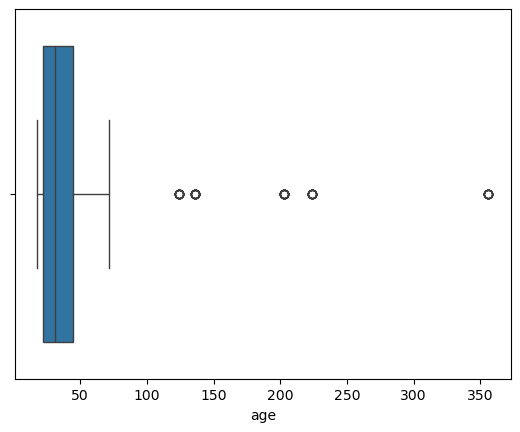

In [17]:
sns.boxplot(x=df['age'])
plt.show()

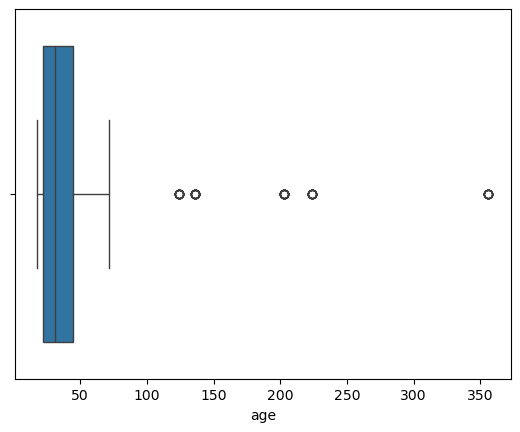

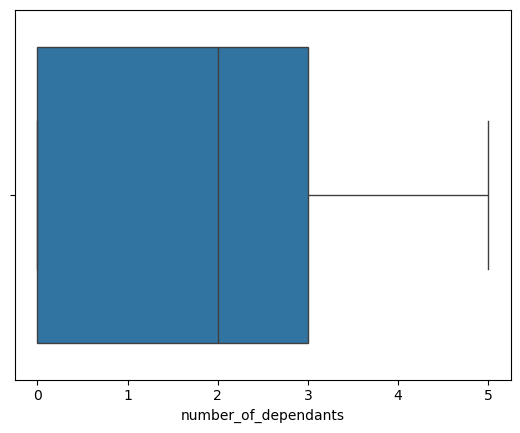

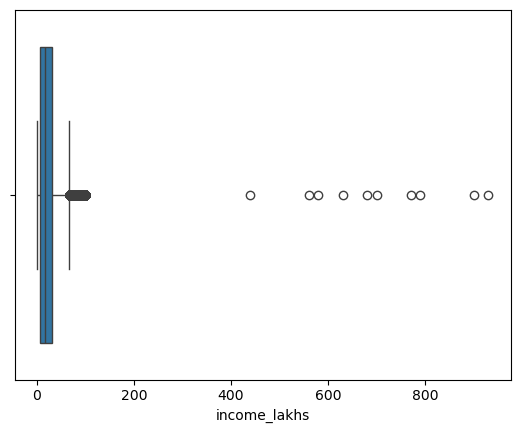

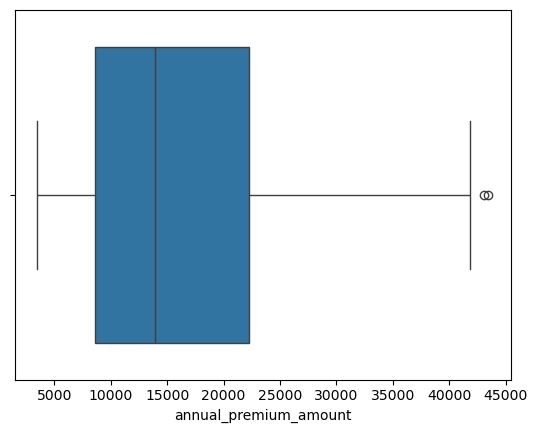

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()
    

In [19]:
df[df.age>100].shape

(58, 13)

In [20]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [21]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

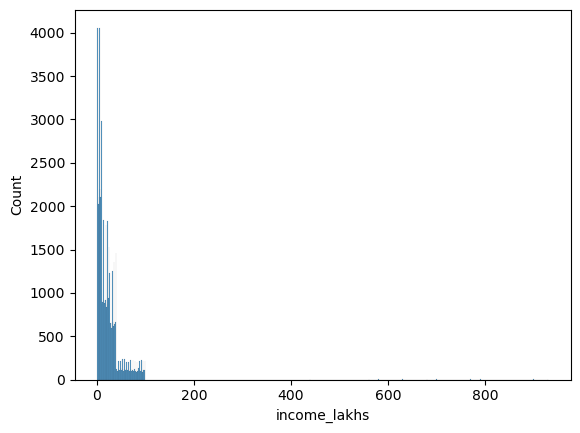

In [22]:
sns.histplot(df1.income_lakhs)

In [23]:
df.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [24]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [25]:
get_iqr_bounds(df1.income_lakhs)

(-29.0, 67.0)

In [26]:
df1.income_lakhs.quantile(0.999)

100.0

In [27]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [28]:
df1[df1.income_lakhs>quantile_threshold].shape

(10, 13)

In [29]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

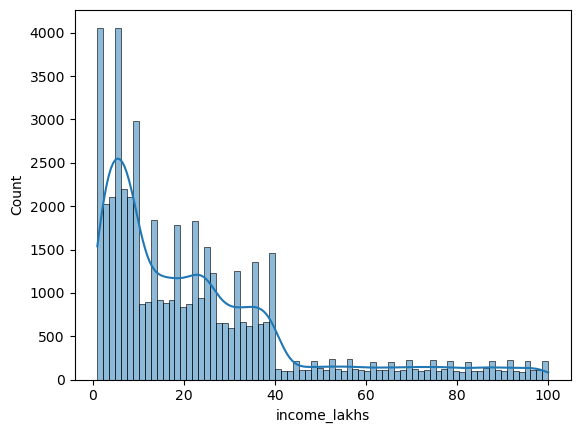

In [30]:
sns.histplot(df2['income_lakhs'], kde=True)

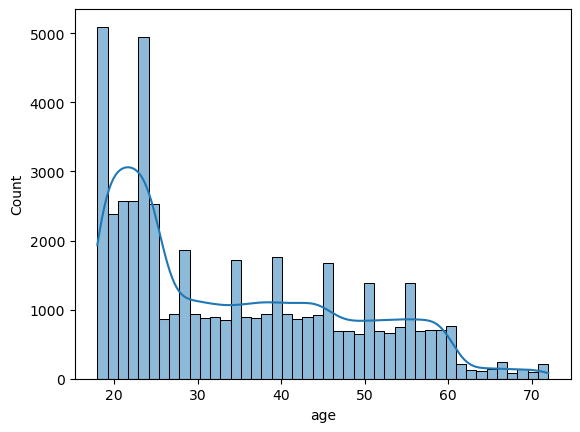

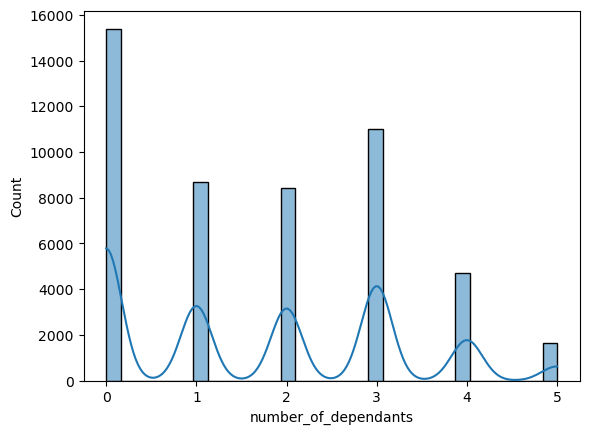

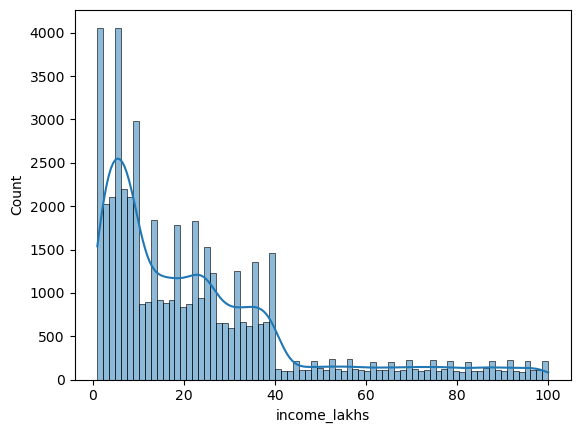

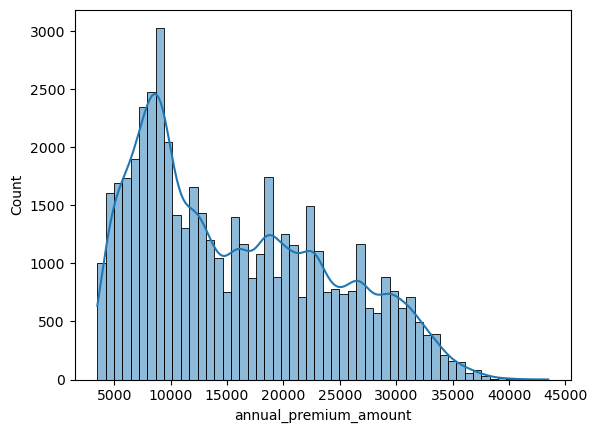

In [31]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

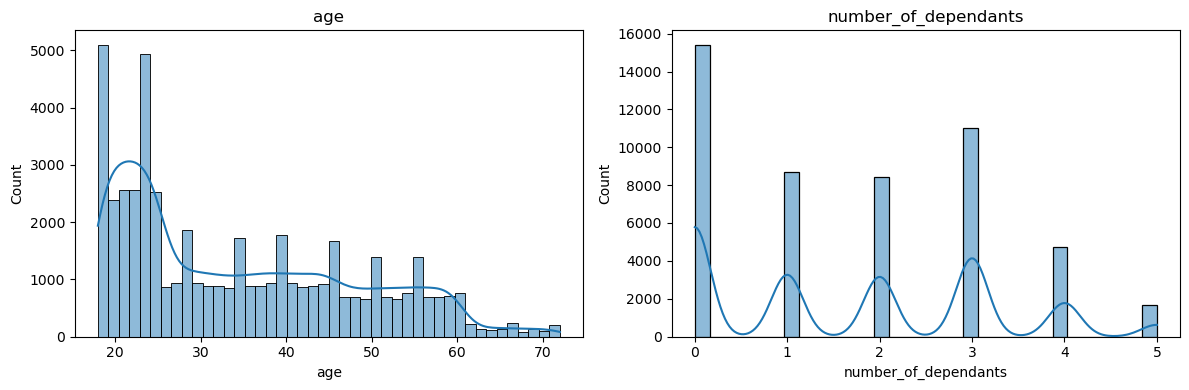

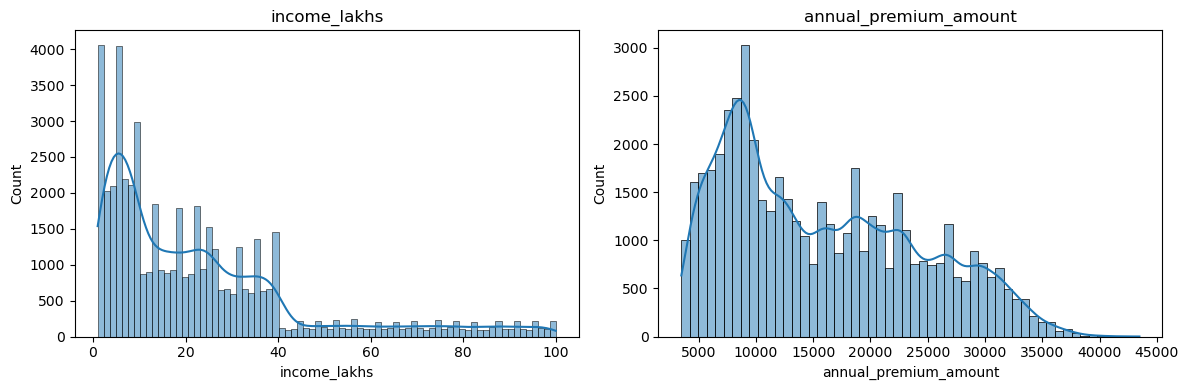

In [32]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # First plot
    sns.histplot(df2[numeric_columns[i]], kde=True, ax=axes[0])
    axes[0].set_title(numeric_columns[i])
    
    # Second plot (check if exists)
    if i + 1 < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i+1]], kde=True, ax=axes[1])
        axes[1].set_title(numeric_columns[i+1])
    else:
        axes[1].axis("off")  # hide empty plot
    
    plt.tight_layout()
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

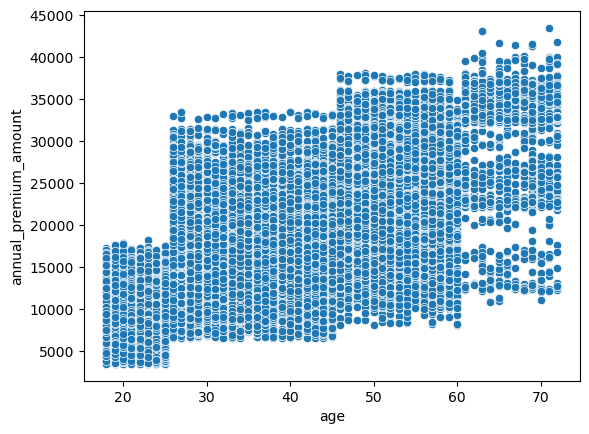

In [33]:
sns.scatterplot(df2, x='age', y='annual_premium_amount')

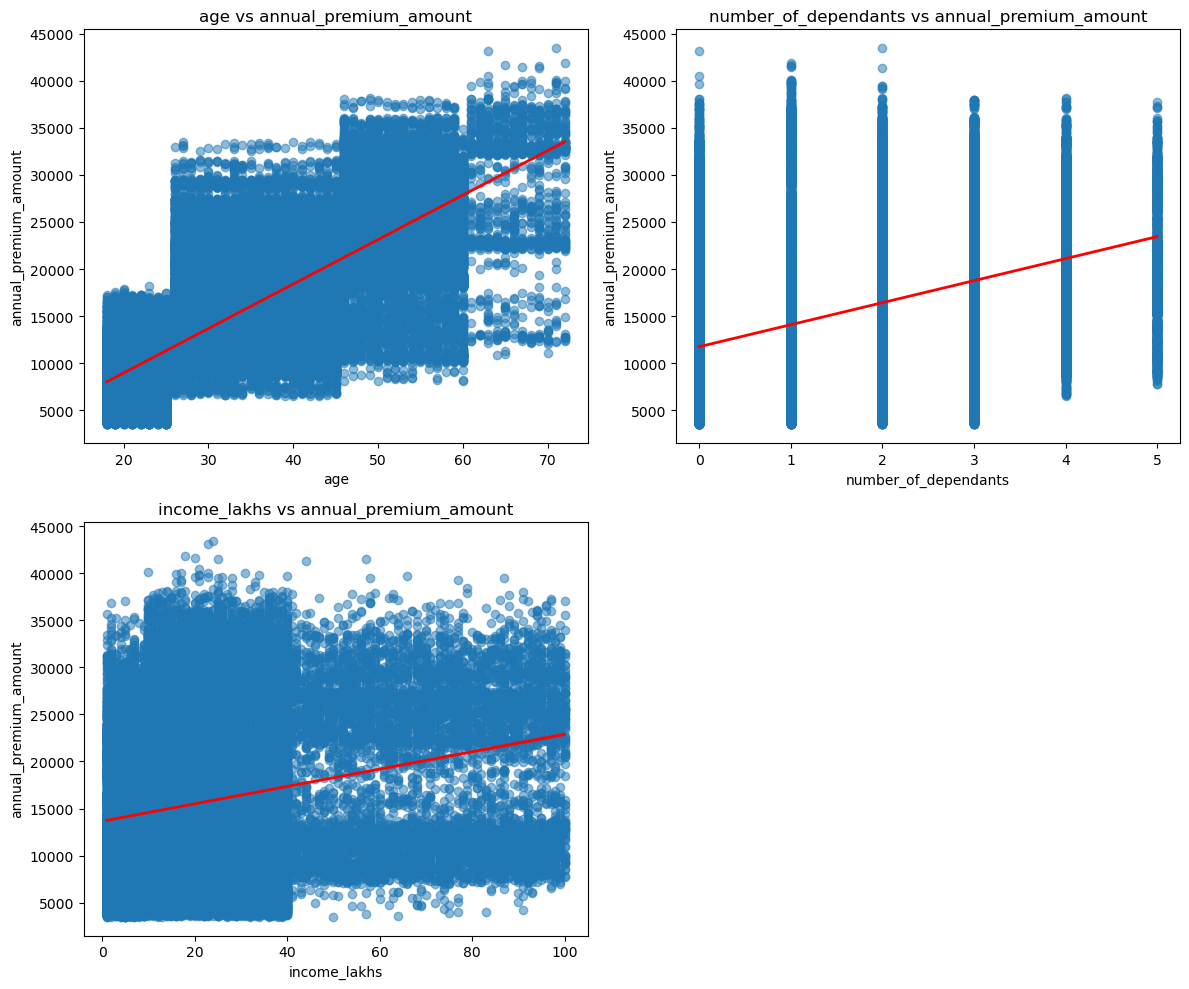

In [34]:

import math

target = 'annual_premium_amount'

# Remove target if it's inside numeric_columns
features = [col for col in numeric_columns if col != target]

n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.regplot(
        data=df2,
        x=col,
        y=target,
        ax=axes[i],
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    axes[i].set_title(f"{col} vs {target}")

# Hide extra empty plots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [35]:
categorical_columns = df2.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [36]:
for col in categorical_columns:
    print(col , ':', df2[col].unique())
    print('-'*60)

gender : ['Male' 'Female']
------------------------------------------------------------
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
------------------------------------------------------------
marital_status : ['Unmarried' 'Married']
------------------------------------------------------------
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
------------------------------------------------------------
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
------------------------------------------------------------
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
------------------------------------------------------------
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
------------------------------------------------------------
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'D

In [37]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
}, inplace=True)

C:\Users\bansa\AppData\Local\Temp\ipykernel_15448\4234562676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [38]:
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [39]:
for col in categorical_columns:
    print(df2[col].value_counts(normalize=True))
    print('-'*70)

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64
----------------------------------------------------------------------
region
Southeast    0.350385
Southwest    0.303038
Northwest    0.200930
Northeast    0.145648
Name: proportion, dtype: float64
----------------------------------------------------------------------
marital_status
Unmarried    0.513545
Married      0.486455
Name: proportion, dtype: float64
----------------------------------------------------------------------
bmi_category
Normal         0.470245
Overweight     0.231245
Underweight    0.155326
Obesity        0.143183
Name: proportion, dtype: float64
----------------------------------------------------------------------
smoking_status
No Smoking    0.547868
Regular       0.313857
Occasional    0.138274
Name: proportion, dtype: float64
----------------------------------------------------------------------
employment_status
Salaried         0.419412
Freelancer       0.308548
Self-Employed    0

<Axes: xlabel='gender', ylabel='annual_premium_amount'>

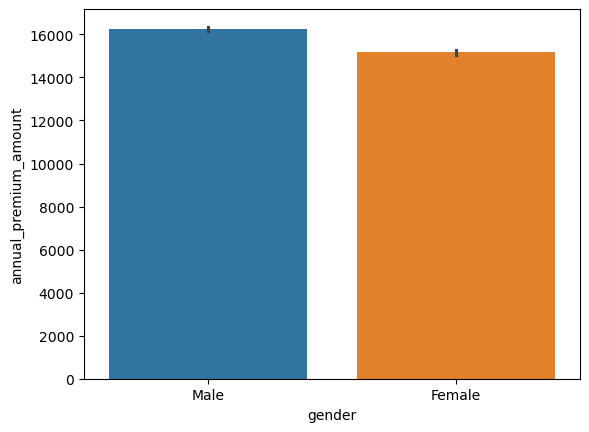

In [40]:
sns.barplot(df2,x='gender', y='annual_premium_amount',hue='gender')

In [41]:
pct_count = df2.gender.value_counts(normalize=True)


<Axes: xlabel='gender'>

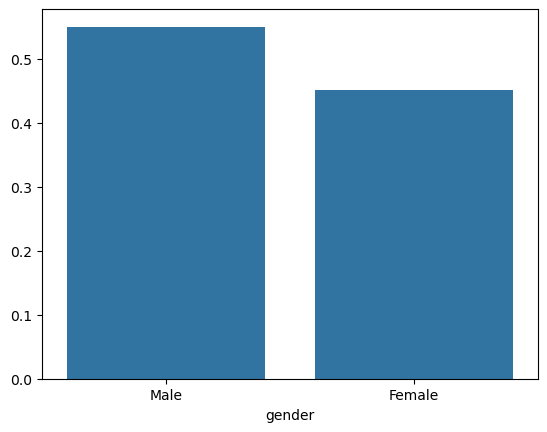

In [42]:
sns.barplot(x=pct_count.index, y=pct_count.values
            )

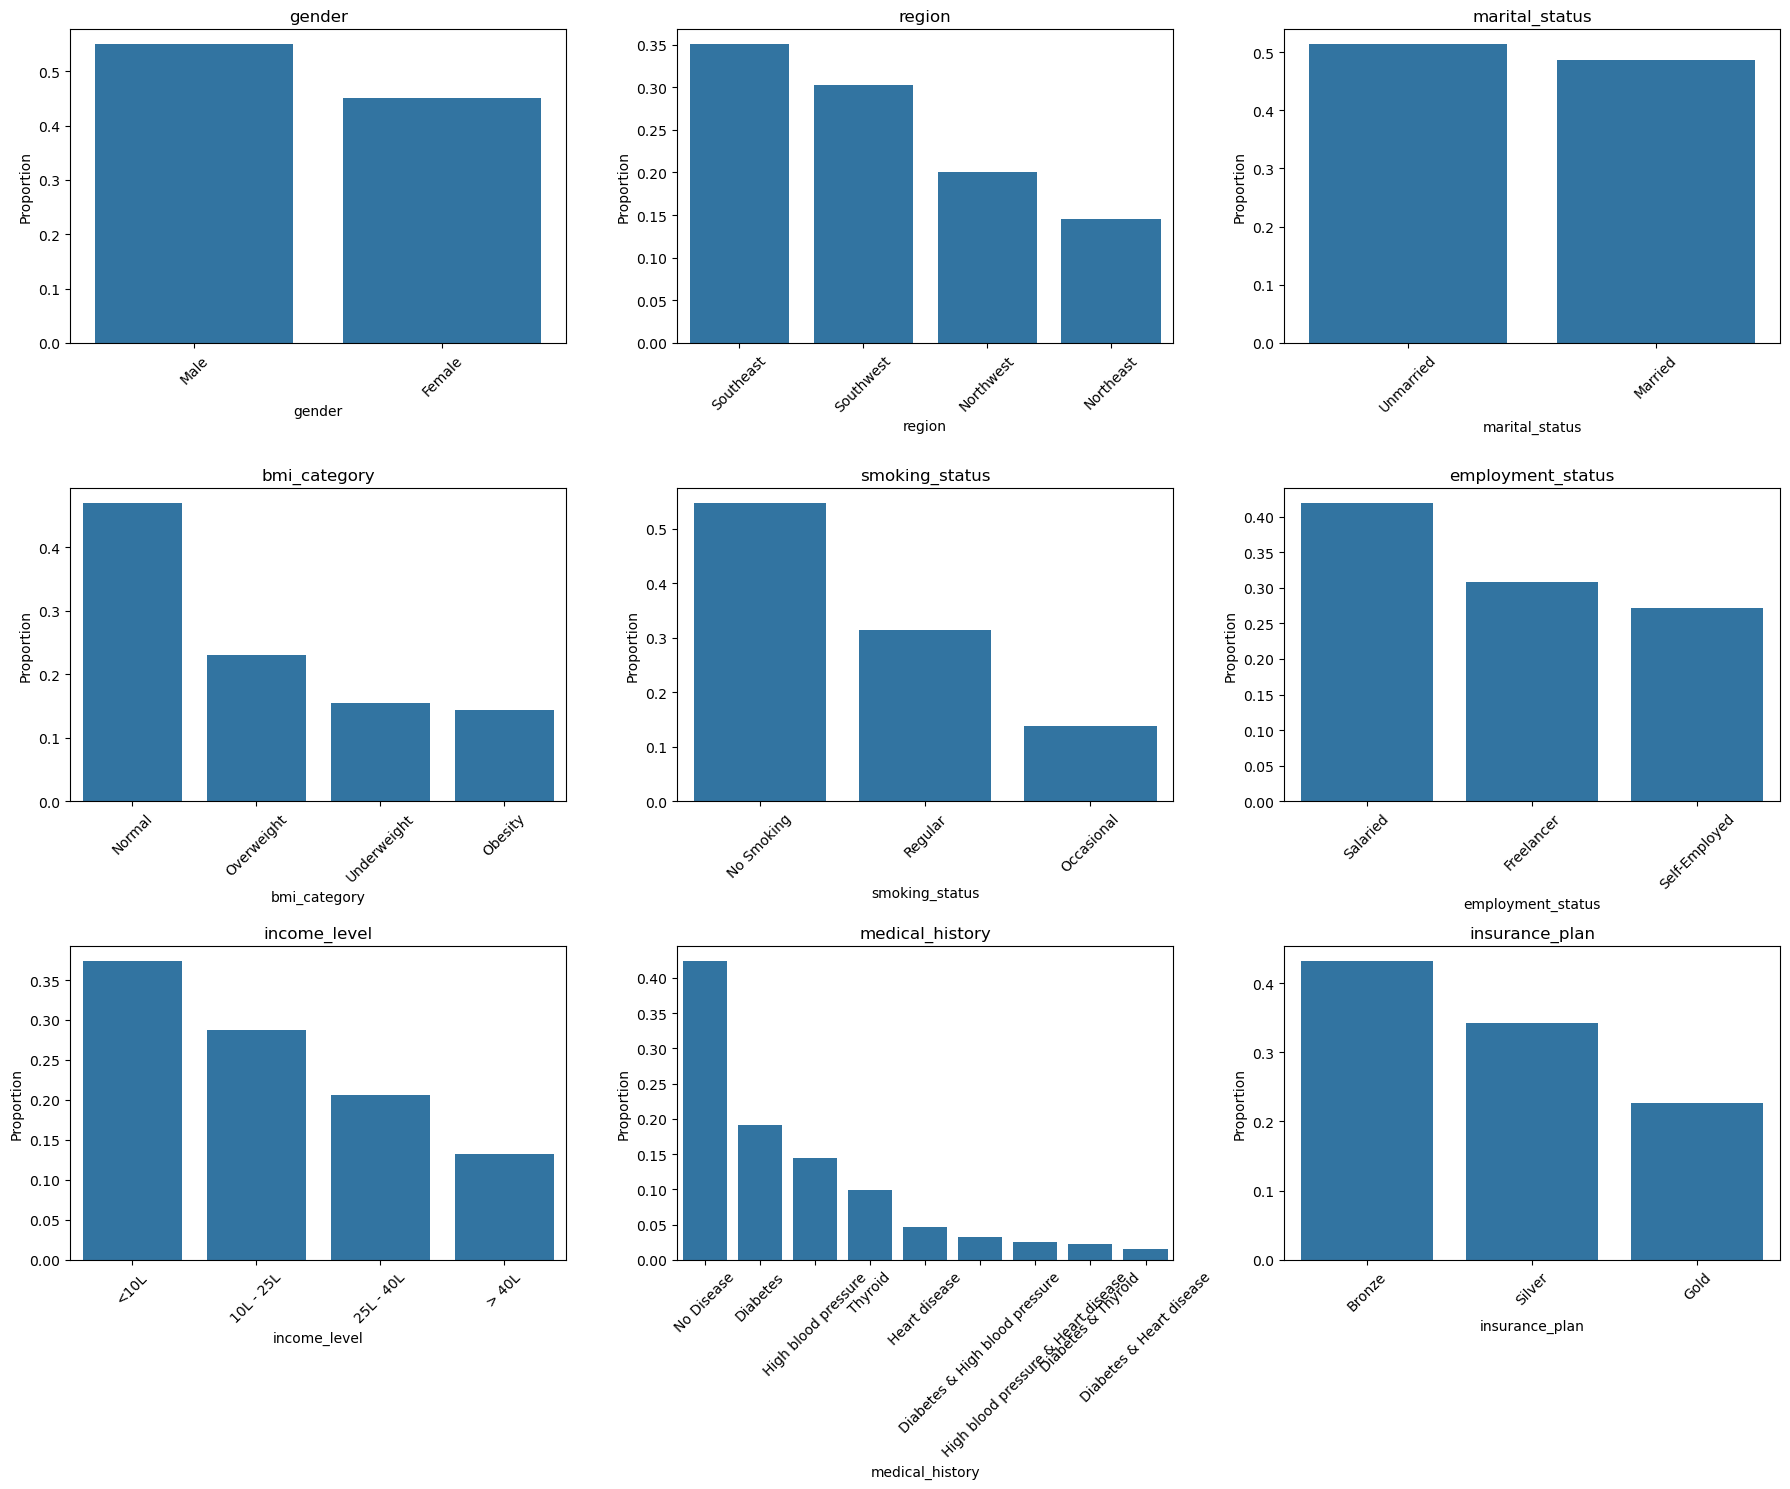

In [43]:
n_cols = 3   # 👈 3 charts per row
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    
    freq = df2[col].value_counts(normalize=True)
    
    sns.barplot(
        x=freq.index,
        y=freq.values,
        ax=axes[i]
    )
    
    axes[i].set_title(col)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty plots if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [44]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


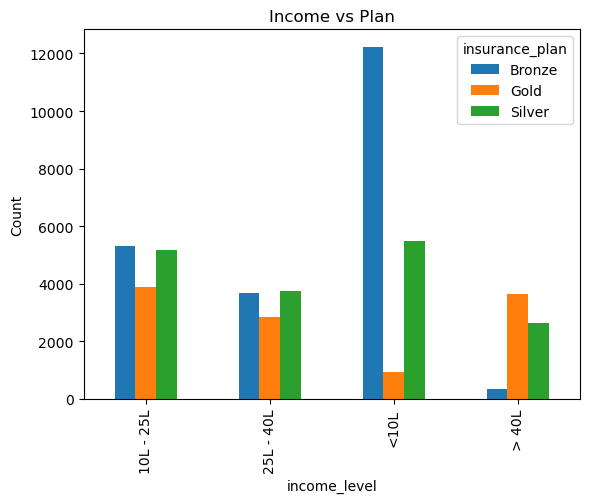

In [45]:
crosstab.plot(kind='bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [46]:
df2.sample()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
5181,26,Female,Southeast,Married,2,Normal,Occasional,Salaried,10L - 25L,18,Diabetes,Silver,16771


In [47]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

#### As per domain understanding , we are assigning risk score to diseases

In [48]:
risk_score = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

df2[['disease1','disease2']] = (
    df2.medical_history.str.split('&', expand=True)
    .apply(lambda x: x.str.lower().str.strip())
)

df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)

df2['total_risk_score'] = 0
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)

C:\Users\bansa\AppData\Local\Temp\ipykernel_15448\2481471933.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\bansa\AppData\Local\Temp\ipykernel_15448\2481471933.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [49]:
print(df2[['disease1', 'disease2', 'total_risk_score']].sample(10))

                  disease1 disease2  total_risk_score
48868           no disease     none                 0
44135           no disease     none                 0
37464        heart disease     none                 8
19927           no disease     none                 0
42252           no disease     none                 0
23262        heart disease     none                 8
14713           no disease     none                 0
12983           no disease     none                 0
28109  high blood pressure     none                 6
12124           no disease     none                 0


In [50]:
max_score = df2.total_risk_score.max()
min_score = df2.total_risk_score.min()

df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
40091,21,Female,Northeast,Married,3,Normal,Regular,Salaried,<10L,7,No Disease,Silver,8946,no disease,none,0,0.0
47646,19,Male,Northwest,Unmarried,0,Overweight,No Smoking,Freelancer,<10L,7,No Disease,Bronze,9332,no disease,none,0,0.0
20784,25,Female,Northwest,Unmarried,0,Normal,No Smoking,Self-Employed,<10L,1,No Disease,Bronze,5556,no disease,none,0,0.0
43131,34,Female,Northwest,Unmarried,2,Normal,No Smoking,Salaried,> 40L,87,Diabetes & Heart disease,Silver,19075,diabetes,heart disease,14,1.0
46301,68,Male,Northwest,Married,1,Overweight,No Smoking,Salaried,<10L,6,No Disease,Silver,22574,no disease,none,0,0.0


In [51]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [52]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [53]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [54]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
32377,40,Male,Southeast,Married,4,Overweight,No Smoking,Freelancer,1,1,Diabetes,1,11298,diabetes,none,6,0.428571
23548,20,Male,Southwest,Unmarried,1,Obesity,No Smoking,Freelancer,3,32,No Disease,1,5737,no disease,none,0,0.000000
32744,41,Male,Southeast,Unmarried,2,Overweight,Regular,Salaried,1,5,No Disease,2,19067,no disease,none,0,0.000000


In [55]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score'],
      dtype='object')

In [56]:
nominal_cols = ['gender', 'region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.sample(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
15819,60,3,3,26,Diabetes,3,28843,diabetes,none,6,...,1,0,0,0,1,0,0,0,0,1
10033,49,3,1,2,High blood pressure,1,13864,high blood pressure,none,6,...,1,0,0,0,0,0,0,1,0,0
43560,43,1,3,37,Diabetes,3,23916,diabetes,none,6,...,0,1,1,0,1,0,0,0,0,1
21501,19,2,2,14,No Disease,1,9329,no disease,none,0,...,0,1,1,0,0,1,0,0,1,0
29537,25,0,2,18,No Disease,1,6419,no disease,none,0,...,0,1,1,0,0,0,0,0,0,0


In [57]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis=1)
df4.sample(5)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
24357,45,3,3,31,2,17304,0.428571,1,0,1,0,0,0,1,0,0,0,1,0
35582,39,3,4,66,3,25079,0.428571,1,0,0,0,0,0,1,0,1,0,0,0
13639,21,0,4,40,2,12754,0.000000,1,0,0,1,1,0,0,1,0,0,1,0
5623,19,0,2,14,1,9256,0.000000,1,0,0,1,1,0,0,0,0,1,0,0
7725,36,3,1,1,1,13919,0.785714,0,0,1,0,0,0,1,0,1,0,0,1


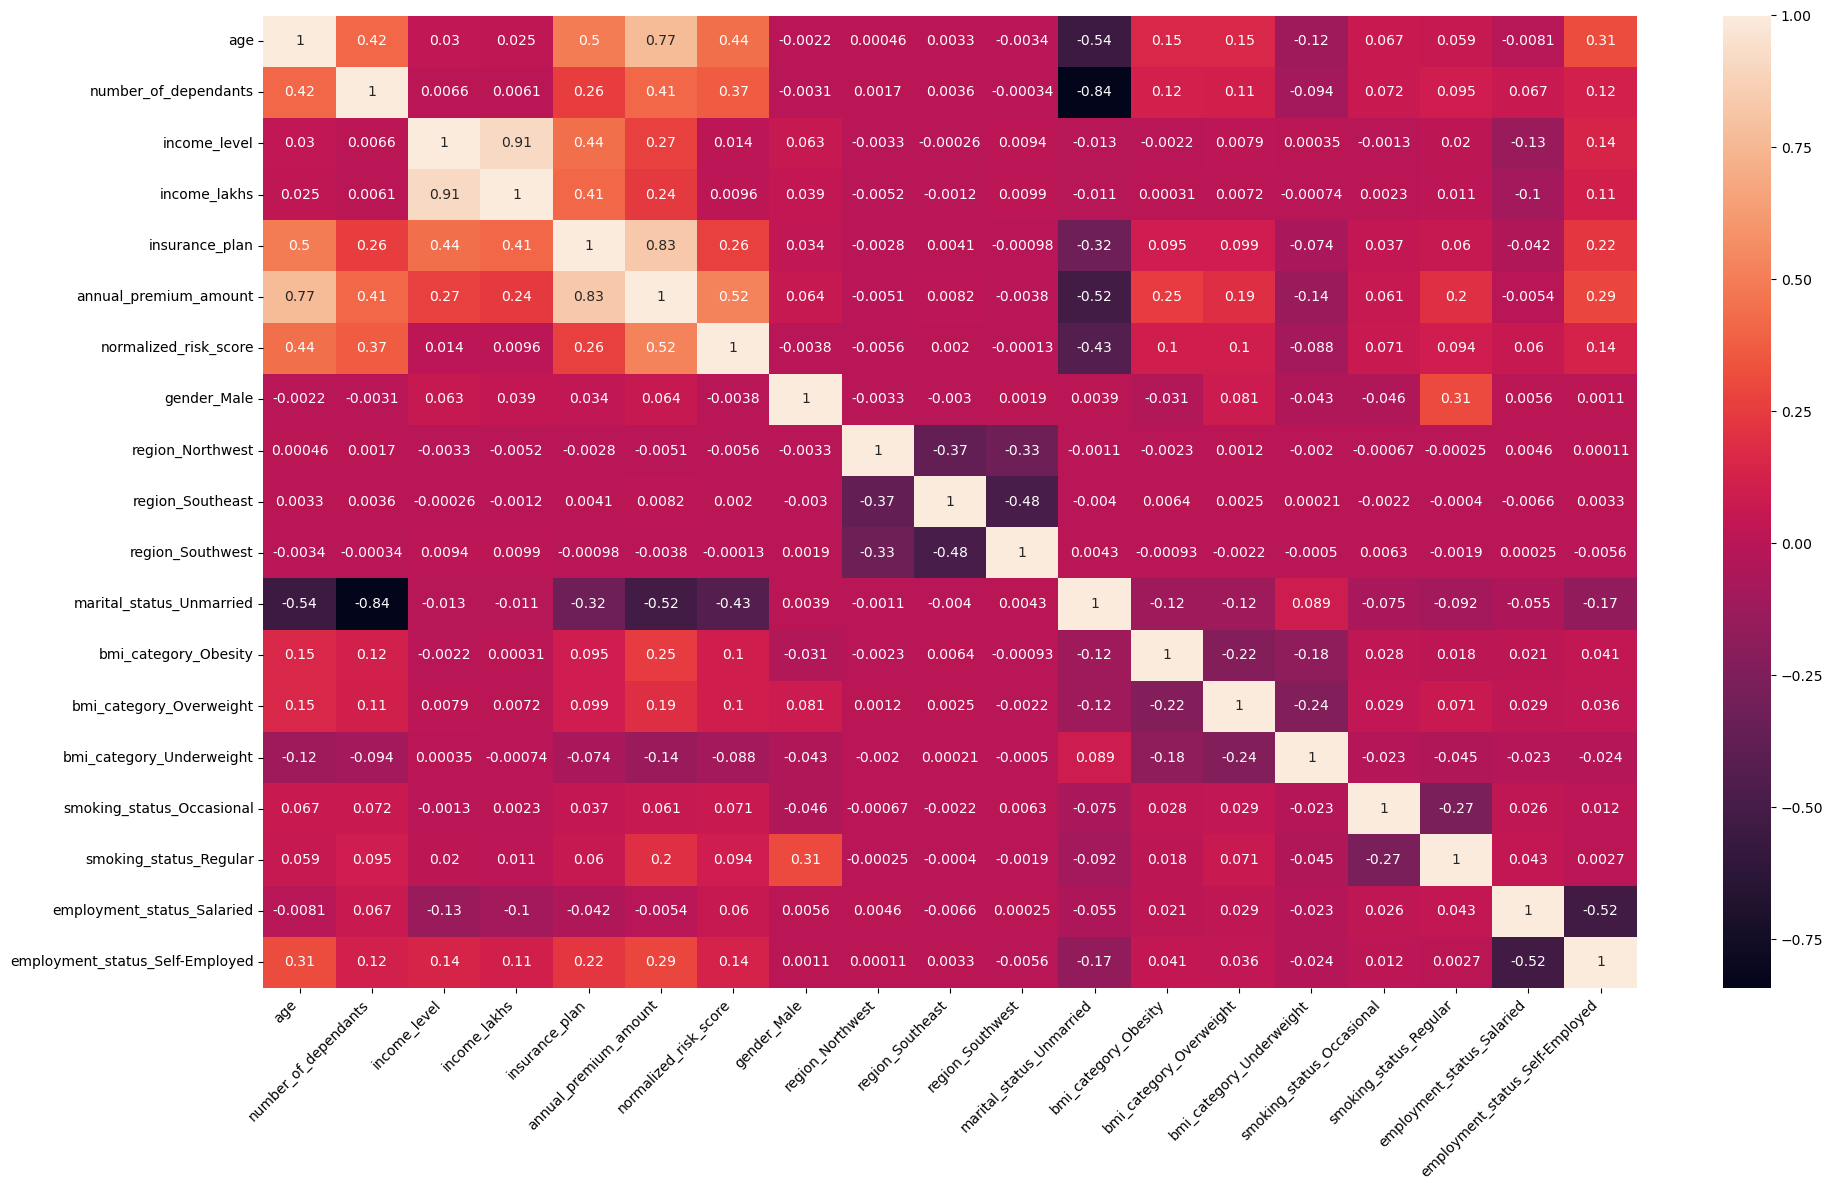

In [58]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Variance Inflation factor

In [59]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_lakhs','insurance_plan']

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.sample(4)


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
35350,0.574074,0.4,4,0.656566,1.0,0.428571,1,0,0,0,0,0,0,1,0,0,0,1
14336,0.092593,0.0,1,0.080808,0.0,0.000000,0,0,1,0,1,0,0,1,0,0,1,0
15282,0.092593,0.0,4,0.414141,0.5,0.000000,0,0,1,0,1,0,0,0,0,0,0,0
49352,0.407407,0.6,2,0.222222,0.5,0.571429,0,0,1,0,0,0,0,0,0,0,1,0


In [60]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,2.097700,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,1.049133,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,1.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,2.000000,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,3.000000,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X)

,Column,VIF
0,age,4.554090
1,number_of_dependants,5.127355
2,income_level,24.639543
3,income_lakhs,10.157957
4,insurance_plan,3.560806
5,normalized_risk_score,2.698098
6,gender_Male,2.446651
7,region_Northwest,2.154506
8,region_Southeast,3.011129
9,region_Southwest,2.746476


In [63]:
calculate_vif(X.drop('income_level', axis=1))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [64]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


## Model Training

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)
print('X_train:', X_train.shape)
print('X_test:',X_test.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train: (34935, 17)
X_test: (14973, 17)
y_train: (34935,)
y_test: (14973,)


In [66]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train, y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr, test_score_lr

(0.9282143576916762, 0.9280547230217837)

In [67]:
from sklearn.metrics import mean_squared_error
y_pred  = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> \nMSE: ", mse_lr ,"\nRMSE: ", rmse_lr)

Linear Regression ==> 
MSE:  5165611.913027984 
RMSE:  2272.7982561212916


In [68]:
model_lr.coef_

array([11160.92646188,  -676.44399066,  -514.22981577, 12557.01293645,
        4810.35770228,   168.64666183,   -35.7192924 ,    39.96512973,
         -24.65292857,  -935.76061134,  3387.91145477,  1599.36226775,
         391.1713038 ,   735.91227798,  2234.8047119 ,   155.9846743 ,
         415.90397305])

## Feature Importance

In [69]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df

,Coefficients
age,11160.926462
number_of_dependants,-676.443991
income_lakhs,-514.229816
insurance_plan,12557.012936
normalized_risk_score,4810.357702
gender_Male,168.646662
region_Northwest,-35.719292
region_Southeast,39.965130
region_Southwest,-24.652929
marital_status_Unmarried,-935.760611


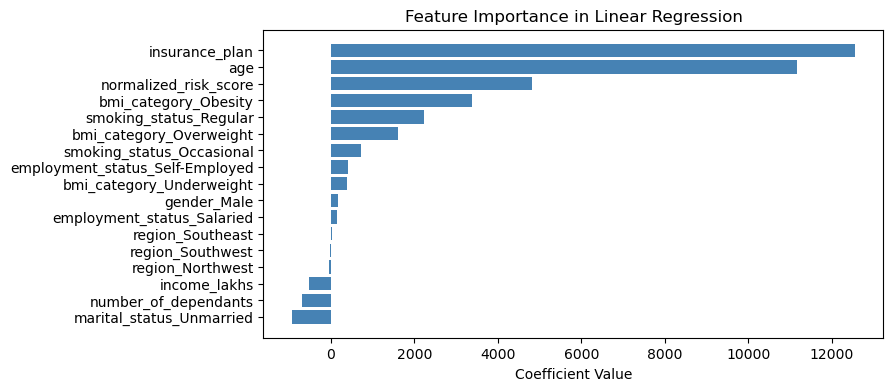

In [70]:
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [71]:
from sklearn.linear_model import Ridge, Lasso

model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg, test_score_rg

(0.9282143198366275, 0.9280541644640345)

In [72]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score_xgb = model_xgb.score(X_train, y_train)
test_score_xgb = model_xgb.score(X_test,y_test)
train_score_xgb, test_score_xgb

(0.9860964417457581, 0.9809534549713135)

In [73]:
y_pred_xgb  = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Regression ==> \nMSE: ", mse_xgb ,"\nRMSE: ", rmse_xgb)

XGBoost Regression ==> 
MSE:  1367525.6922808294 
RMSE:  1169.412541527082


In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
param_grid_xgb = {
    'n_estimators': [20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth': [3,4,5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid_xgb, n_iter=20, cv=3, scoring='r2', random_state=10)
random_search.fit(X_train, y_train)
random_search.best_score_


0.9817558725674947

In [75]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 5, 'learning_rate': 0.2}

In [76]:
best_model = random_search.best_estimator_

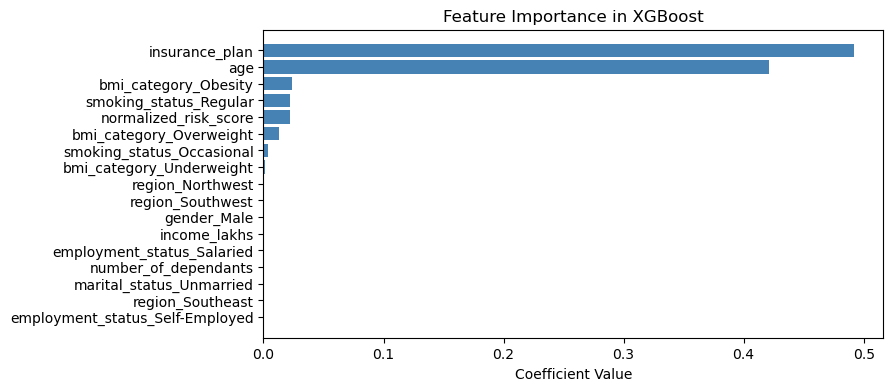

In [77]:
feature_importances = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

## Error Analysis

In [78]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
    
})
results_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20576.011719,22.011719,0.107092
35794,29647,29390.083984,-256.916016,-0.866584
43608,20560,20616.943359,56.943359,0.276962
42730,5018,6943.274902,1925.274902,38.367375
18936,8929,7937.507812,-991.492188,-11.104179


<Axes: xlabel='diff_pct', ylabel='Count'>

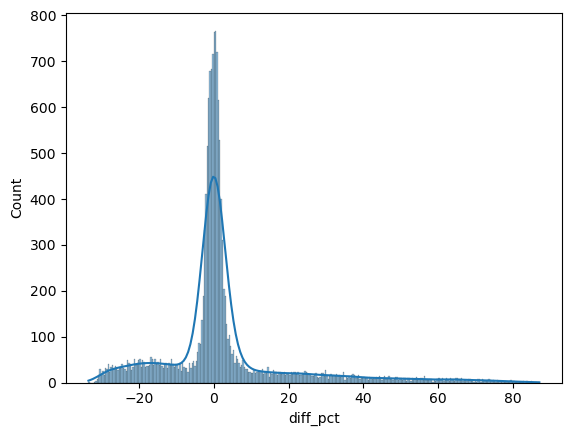

In [79]:
sns.histplot(results_df['diff_pct'], kde=True)

In [80]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]

In [81]:
extreme_results_df.shape , results_df.shape

((4412, 4), (14973, 4))

In [82]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]

In [83]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct
36269,3501,6553.415527,3052.415527,87.186962
42342,3521,6553.415527,3032.415527,86.123701
18564,3523,6529.975586,3006.975586,85.352699
9118,3536,6550.295898,3014.295898,85.245925
48801,3516,6510.037109,2994.037109,85.154639
...,...,...,...,...
47179,4725,7100.658691,2375.658691,50.278491
27859,5162,7756.020996,2594.020996,50.252247
43990,4748,7129.710449,2381.710449,50.162394
23743,4675,7014.699219,2339.699219,50.047042


<Axes: xlabel='income_lakhs', ylabel='Count'>

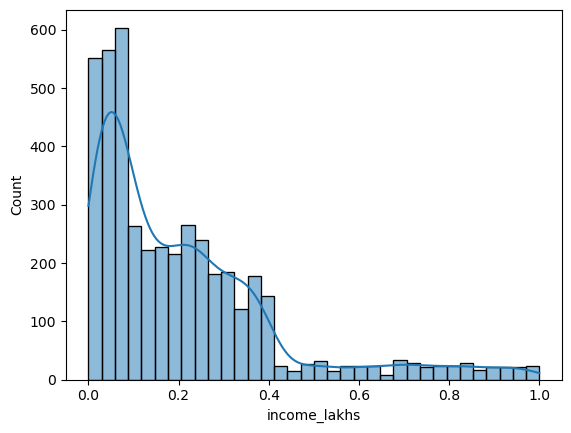

In [84]:
extreme_errors_df = X_test.loc[extreme_results_df.index]

sns.histplot(extreme_errors_df.income_lakhs, kde=True)


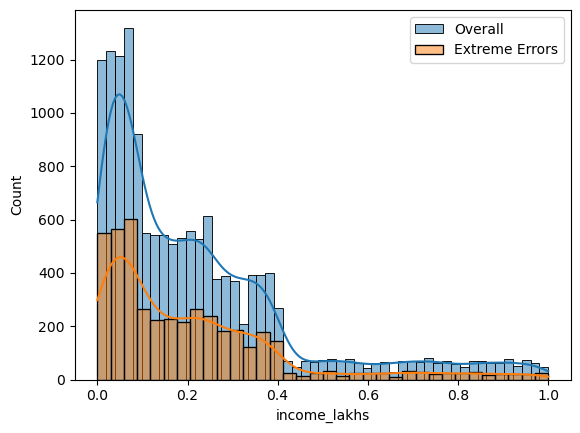

In [86]:
sns.histplot(X_test.income_lakhs, label='Overall', kde=True)
sns.histplot(extreme_errors_df.income_lakhs, label='Extreme Errors', kde=True)
plt.legend()
plt.show()

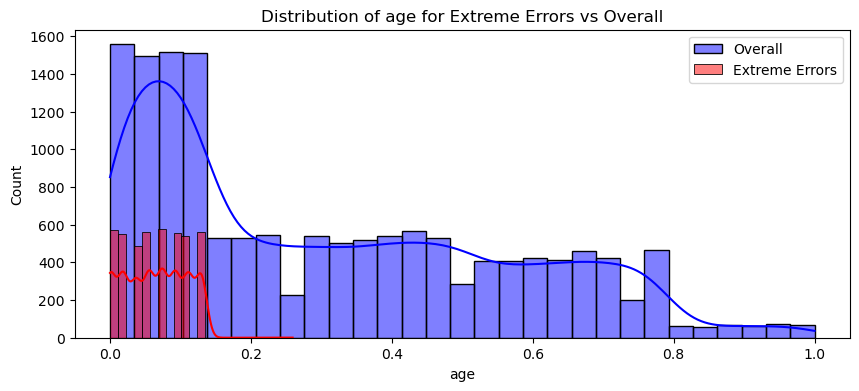

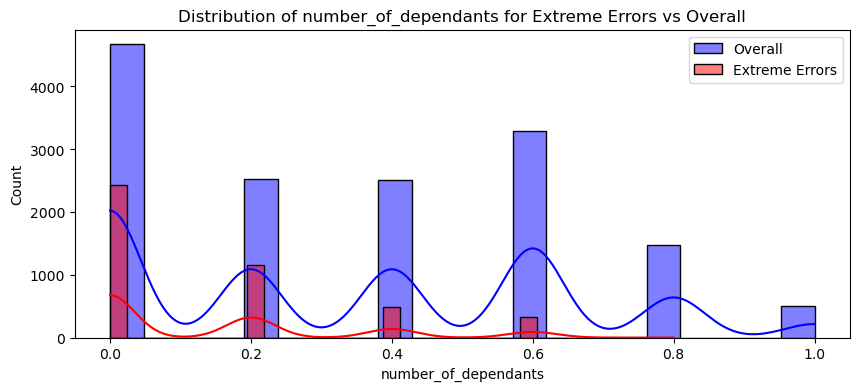

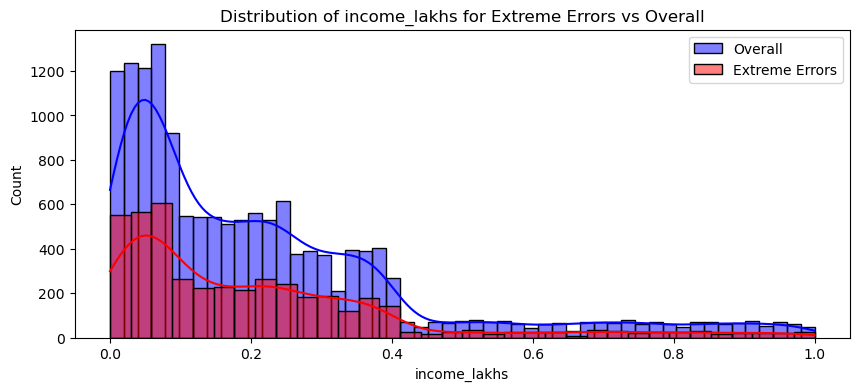

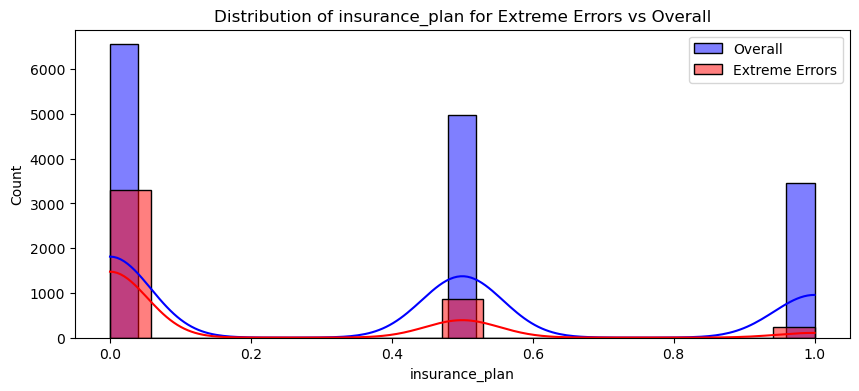

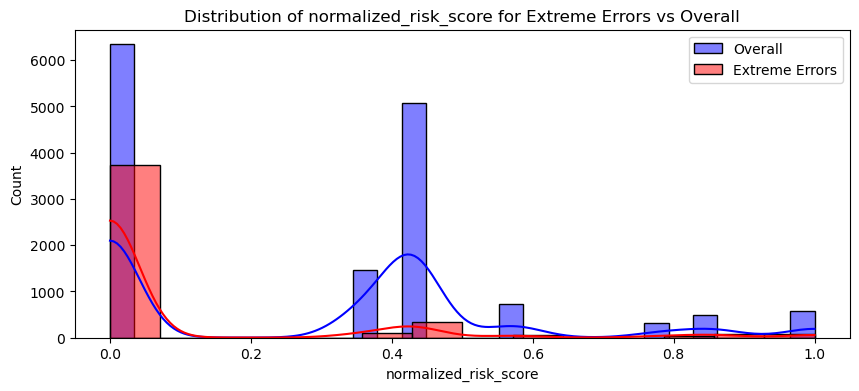

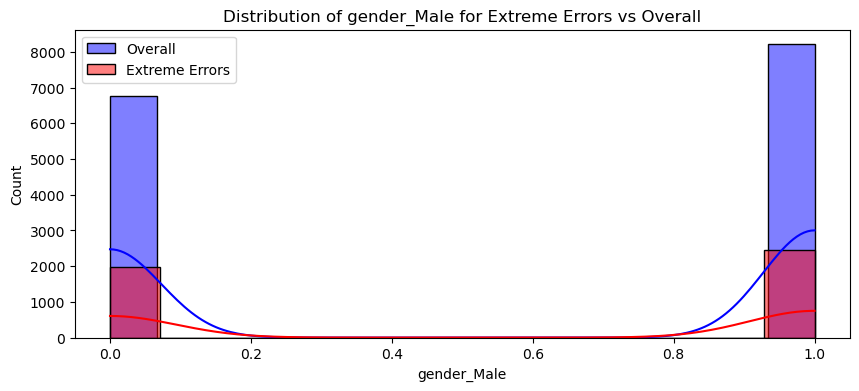

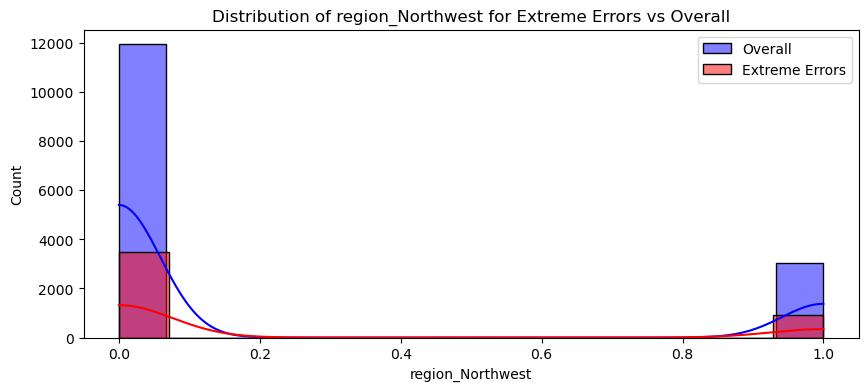

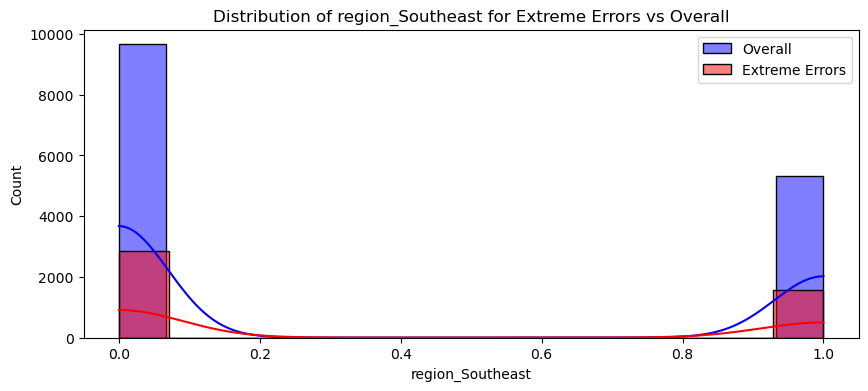

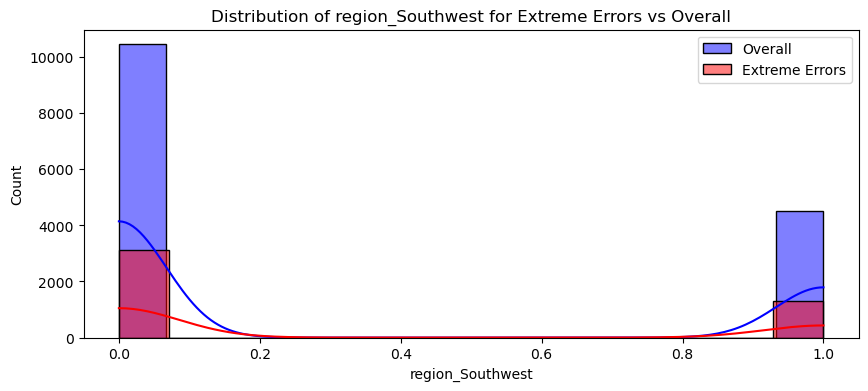

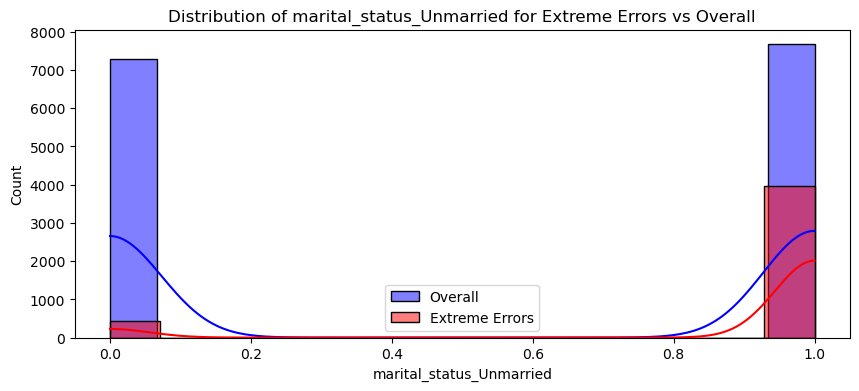

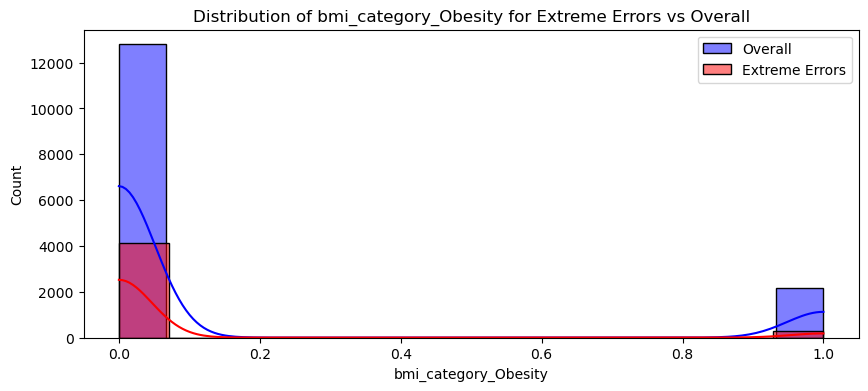

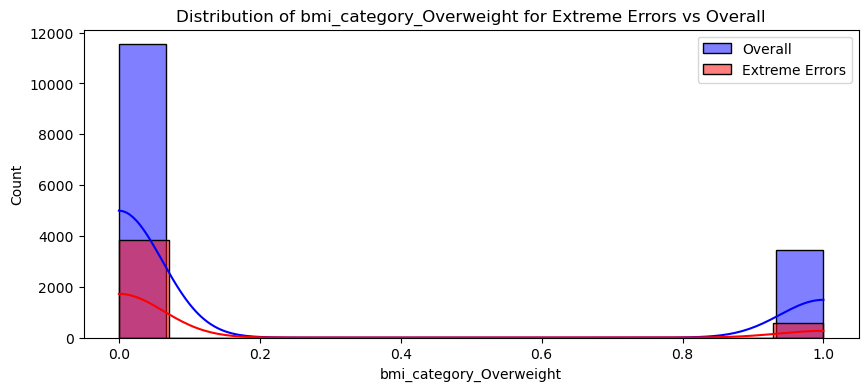

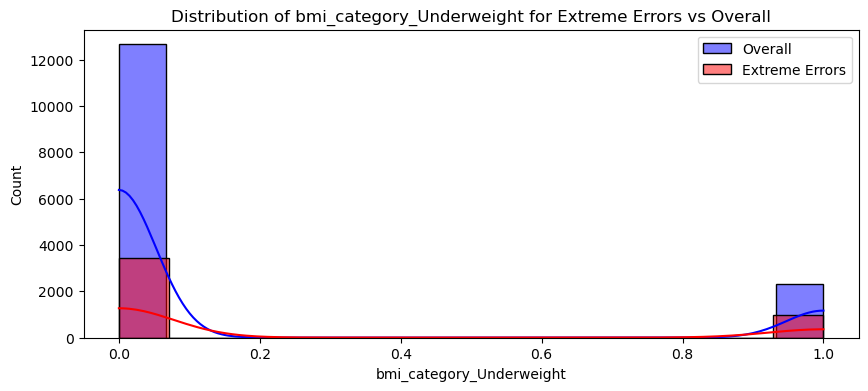

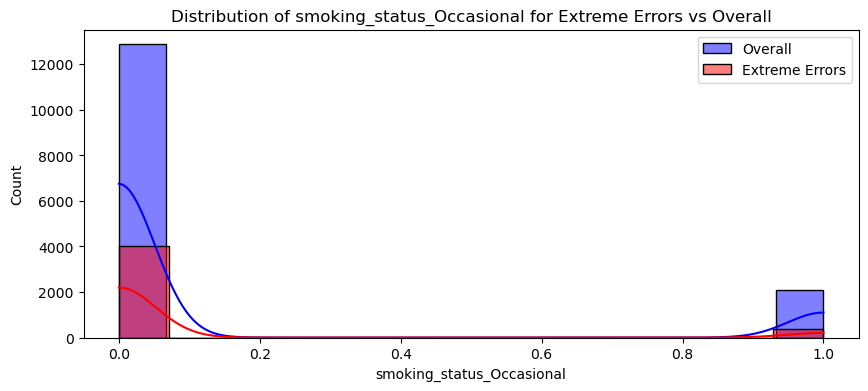

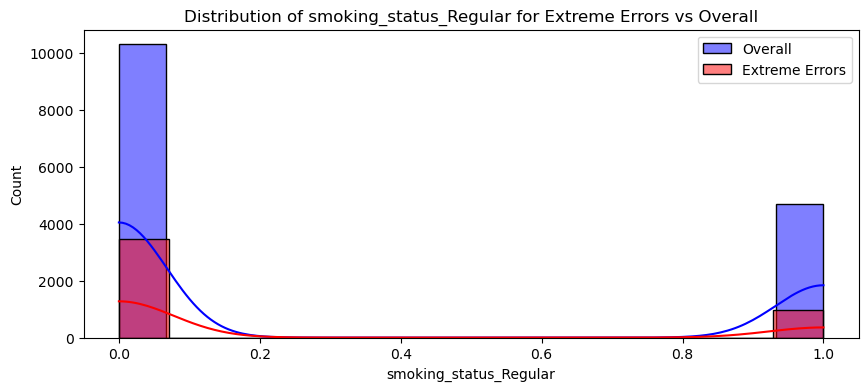

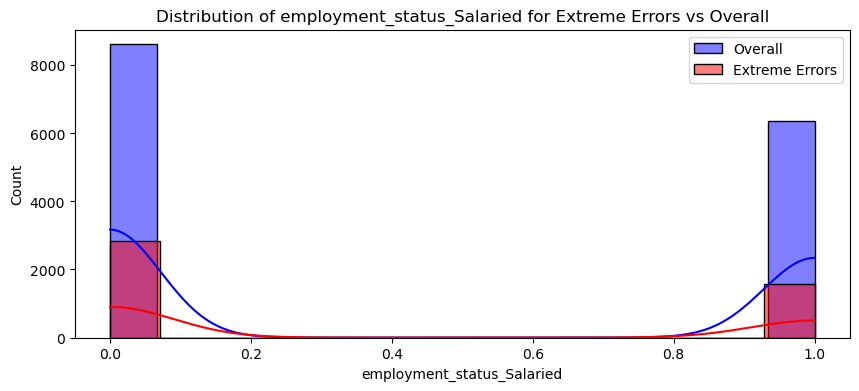

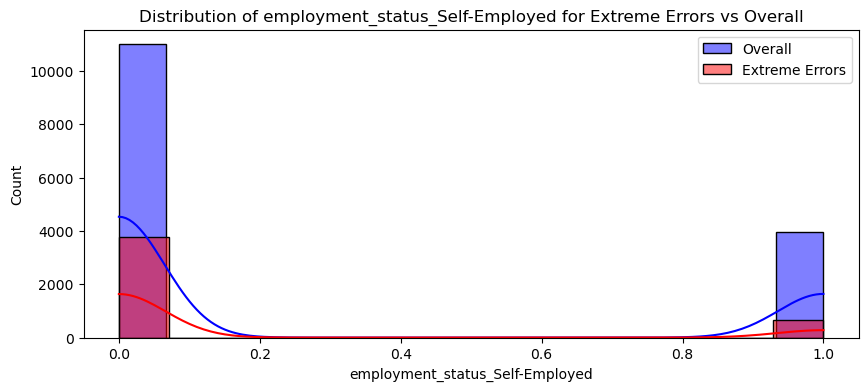

In [88]:
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(X_test[feature], color='blue',label='Overall', alpha=0.5, kde=True)
    sns.histplot(extreme_errors_df[feature],color='red',label='Extreme Errors', kde=True)
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme Errors vs Overall")
    plt.show()

### Let's investigate age column in detail. because extreme errors are more in lower age group area

In [91]:
extreme_errors_df['income_level'] = -1

In [92]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed


,age,number_of_dependants,income_lakhs,insurance_plan
0,23.0,1.0,14.0,1.0
1,22.0,0.0,21.0,1.0
2,19.0,1.0,4.0,1.0
3,18.0,1.0,3.0,1.0
4,21.0,0.0,25.0,1.0
...,...,...,...,...
4407,19.0,1.0,8.0,1.0
4408,25.0,0.0,12.0,1.0
4409,21.0,0.0,7.0,2.0
4410,21.0,1.0,8.0,1.0


<Axes: xlabel='age', ylabel='Count'>

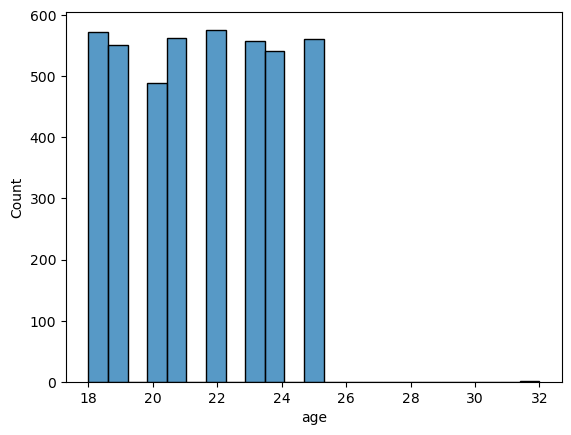

In [93]:
sns.histplot(df_reversed.age)

In [94]:
df_reversed.age.quantile(0.97)

25.0

### 97% data of extreme_errors group , has age group below 25. clearly this age group has some problems. so we will build two models , one for age group below 25 , another for age group above 25.